In [295]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import re

### Auxiliary functions

In [2]:
def format_equation(str_equ, exp = 'x', var = 'x'):
    strOut = re.sub(r"{}".format(var), "({})".format(var), str_equ)
    strOut = re.sub(r"(?<=[A-Za-z0-9\)])(\({}\))".format(var), "*({})".format(var), strOut)
    strOut = re.sub(r"(?<=[0-9])\(", "*(", strOut)
    strOut = re.sub(r"(\^\({}\))".format(var), "**({})".format(var), strOut)
    strOut = re.sub(r"(\({}\))".format(var), "({})".format(exp), strOut)
    strOut = re.sub(r"\^", "**", strOut)
    
    strOut = re.sub(r"e", "math.e", strOut)
    strOut = re.sub(r"pi", "math.pi", strOut)
    strOut = re.sub(r"sin", "math.sin", strOut)
    strOut = re.sub(r"cos", "math.cos", strOut)
    strOut = re.sub(r"tan", "math.tan", strOut)
    strOut = re.sub(r"(?<=[A-Za-z0-9\)])(math.)", "*math.", strOut)
    return strOut

In [3]:
def format_secondVar(str_equ, var):
    strOut = re.sub(r"(?<=[A-Za-z0-9\)])({})".format(var), "*({})".format(var), str_equ)
    return strOut

In [4]:
#format_equation("2x^5+ 3x + x^2 + e^x + 3xy + 3sin(y) - 4cos(x) + 100(x + y)", 'x + h', 'y')
#format_equation("1/2x^TQx + c^Tx", 'x + h', 'x')

In [5]:
#format_secondVar("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + y^4", 'x')

In [6]:
def evaluate_Fx(str_equ, x):
    x = float(x)
    strOut = format_equation(str_equ, 'x')
    result = eval(strOut)
    return result

In [7]:
def finite_derivative(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = f3 = '(' +  str_equ + ')'
    
    f1 = format_equation(f1, 'x + 2*h')
    f2 = format_equation(f2, 'x + h')
    f3 = format_equation(f3, 'x')
      
    strOut = '(' + f1 + ' - 4 * ' + f2 + ' + 3 *' + f3 + ')' + ' / (2 * h)'
    result = eval(strOut)
    return result

## Lab1 Functions (derivatives)

#### R1 functions

In [8]:
def center_finite_derivative(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = '(' +  str_equ + ')'
    
    f1 = format_equation(f1, 'x + h')
    f2 = format_equation(f2, 'x - h')
      
    strOut = '(' + f1 + ' - ' + f2 + ')' + ' / (2 * h)'
    result = eval(strOut)
    return np.array(result, dtype = np.float32)

In [9]:
def progressive_finite_derivative(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = f3 = '(' +  str_equ + ')'
   
    f1 = format_equation(f1, 'x')
    f2 = format_equation(f2, 'x + h')
    f3 = format_equation(f3, 'x + 2*h')
      
    strOut = '( -3 * ' + f1 + ' + 4 * ' + f2 + ' - ' + f3 + ')' + ' / (2 * h)'
    result = eval(strOut)
    return np.array(result, dtype = np.float32)

In [10]:
def center_finite_derivative_2(str_equ, x, h):
    x = float(x)
    h = float(h)
    f1 = f2 = f3 = f4 = '(' +  str_equ + ')'
    
    f1 = format_equation(f1, 'x + h')
    f2 = format_equation(f2, 'x - h')   
    f3 = format_equation(f3, 'x + 2*h')   
    f4 = format_equation(f4, 'x - 2*h')   
      
    strOut = '(' + f4 + ' - 8 * ' + f2 + ' + 8 * ' + f1 + ' - ' + f3 + ')' + ' / (12 * h)'
    result = eval(strOut)
    return np.array(result, dtype = np.float32)

In [11]:
#center_finite_derivative("2x^5 - 3", 1, 2)

In [12]:
#progressive_finite_derivative("2x^5 - 3", 1, 2)

In [13]:
#center_finite_derivative_2("2x^5 - 3", 1, 2)

#### R2 Functions

In [14]:
def center_finite_derivative_r2(str_equ, p, h):
    x = float(p[0])
    y = float(p[1])
    h = float(h)
    
    str_parciales = []
    for var in ['x', 'y']:
        #equ = str_equ.replace('y', '*(y)') if var == 'x' else str_equ.replace('x', '*(x)')
        equ = format_secondVar(str_equ, 'y') if var == 'x' else format_secondVar(str_equ, 'x')
        f1 = f2 = '(' +  equ + ')'
 
        f1 = format_equation(f1, var + ' + h', var)   
        f2 = format_equation(f2, var + ' - h', var)   
      
        strOut = '(' + f1 + ' - ' + f2 + ')' + ' / (2 * h)'
        str_parciales.append(strOut)
    
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, {'x': x, 'y': y, 'h': h}) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [15]:
def progressive_finite_derivative_r2(str_equ, p, h):
    x = float(p[0])
    y = float(p[1])
    h = float(h)
     
    str_parciales = []
    for var in ['x', 'y']:
        equ = format_secondVar(str_equ, 'y') if var == 'x' else format_secondVar(str_equ, 'x')
        f1 = f2 = f3 = '(' +  equ + ')'
   
        f1 = format_equation(f1, var, var)   
        f2 = format_equation(f2, var + '+ h', var)   
        f3 = format_equation(f3, var + ' + 2*h', var)   
        
        strOut = '(-3 * ' + f1 + ' + 4 * ' + f2 + ' - ' + f3 + ')' + ' / (2 * h)'
        str_parciales.append(strOut)
        
        
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, {'x': x, 'y': y, 'h': h}) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [16]:
def center_finite_derivative_2_r2(str_equ, p, h):
    x = float(p[0])
    y = float(p[1])
    h = float(h)
     
    str_parciales = []
    for var in ['x', 'y']:
        equ = format_secondVar(str_equ, 'y') if var == 'x' else format_secondVar(str_equ, 'x')
        f1 = f2 = f3 = f4 = '(' +  equ + ')'
    
        f1 = format_equation(f1, var + ' + h', var)   
        f2 = format_equation(f2, var + ' - h', var)   
        f3 = format_equation(f3, var + ' + 2*h', var)   
        f4 = format_equation(f4, var + ' - 2*h', var)   
        
        strOut = '(' + f4 + ' - 8 * ' + f2 + ' + 8 * ' + f1 + ' - ' + f3 + ')' + ' / (12 * h)'
        str_parciales.append(strOut)     
    
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, {'x': x, 'y': y, 'h': h}) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [17]:
#format_secondVar("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", 'x')

In [18]:
#center_finite_derivative_r2("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", ['2', '4'], 0.001)
#progressive_finite_derivative_r2("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", ['2', '4'], 0.001)
#center_finite_derivative_2_r2("3x^4 - 2x^3y - 4x^2y^2 + 5xy^3 + 2y^4", ['2', '3'], 0.001)

### Any R Space Derivative Function

In [19]:
def center_finite_derivative_2_full(str_equ, p, h):
    x = np.array(p, dtype = np.float32)
    all_vars = ['x_{}'.format(i) for i in range(0, len(x))]
    vars_dict = {var: x_val for (var, x_val) in zip(all_vars, x)}
    vars_dict['h'] = h
    
    str_parciales = []
    equ = str_equ
    for i in range(0, len(x)):
        var = 'x_{}'.format(i)
        for incognita in all_vars:
            if incognita != var:
                equ = format_secondVar(equ, incognita)
        f1 = f2 = f3 = f4 = '(' +  equ + ')'
    
        f1 = format_equation(f1, var + ' + h', var)   
        f2 = format_equation(f2, var + ' - h', var)   
        f3 = format_equation(f3, var + ' + 2*h', var)   
        f4 = format_equation(f4, var + ' - 2*h', var)   
        
        strOut = '(' + f4 + ' - 8 * ' + f2 + ' + 8 * ' + f1 + ' - ' + f3 + ')' + ' / (12 * h)'
        str_parciales.append(strOut)     
    
    #[print(parcial) for parcial in str_parciales]
    result = [eval(parcial, {}, vars_dict) for parcial in str_parciales]
    return np.array(result, dtype = np.float32)

In [20]:
#center_finite_derivative_2_full("3x_0^4 - 2x_1^3 - 4x_2^2x_1 + x_0", ['1', '2', '3'], 0.001)

## Lab2 Functions (ceros)

In [21]:
def metodo_biseccion(str_equ, interval, k_max, epsilon):
    k = 0
    a = float(interval[0])
    b = float(interval[1])
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Error': []}
    
    x_k = (a + b) / 2    
    while k < k_max and error > epsilon:
        Fa = evaluate_Fx(str_equ, a)
        Fx_k = evaluate_Fx(str_equ, x_k)
        if (Fa * Fx_k) < 0:
            b = x_k
        else:
            a = x_k
        
        k += 1
        x_k = (a + b) / 2
        error = abs(Fx_k)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k)
        data['Error'].append(error)
        
    results = pd.DataFrame(data)
    return results

In [22]:
def metodo_newton(str_equ, x_0, k_max, epsilon):
    k = 0
    x_k = x_0
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Error': []}
    
    while k < k_max and error > epsilon:
        Fx_k = evaluate_Fx(str_equ, x_k)
        dev1_Fx_k = center_finite_derivative_2(str_equ, x_k, 0.00001)
        
        x_k1 = x_k - (Fx_k / dev1_Fx_k)
        x_k = x_k1
        k += 1
        error = abs(Fx_k)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k)
        data['Error'].append(error)
        
    results = pd.DataFrame(data)
    return results

In [23]:
#equ = "3x^2 + 4x - 3"
#equ = "e^x + x^2"

#df = metodo_biseccion(equ, ['-4', '4'], 50, 0.001)
#df = metodo_newton(equ, 0.1, 50, 0.0001)
#df.tail()

## Lab3 Functions (GD)

In [212]:
def parseInput(x, reshape = False):
    if reshape:
        rows = len(x)
        x = np.array(x, dtype = 'float').reshape(rows, 1)
    else:
        x = np.array(x, dtype = 'float')

    return x

In [213]:
def getLearningRate(opt, k, gradient = None, Q = None, alpha = 0.001):
    if opt == 'Exacto':
        lr = (np.linalg.norm(gradient, 2)**2) / np.matmul(np.matmul(gradient.T, Q), gradient)
        lr = lr[0, 0]
    elif opt == 'Constante':
        lr = alpha
    elif opt == 'Variable':
        lr = 1/k
    else:
        lr = 1
        
    return lr

In [214]:
def gradient_descent_QP(x_0, Q, c, kmax, epsilon, lr_type, alpha = 0.001):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    c = parseInput(c, reshape = True)
    Q = parseInput(Q)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}
      
    while k < kmax and error > epsilon:
        gradient = np.matmul(Q, x_k) + c
        lr = getLearningRate(lr_type, k + 1, gradient, Q, alpha)
        x_k1 = x_k - (lr * gradient)
        
        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k)
        data['Pk'].append(-1 * gradient)
        data['Error'].append(error)     
  
    results = pd.DataFrame(data)
    return results

In [215]:
#First and second try
Q = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
c = np.array([1, 0 ,1]).reshape(3, 1)
#x_0 = np.array([3, 5, 7]).reshape(3, 1)
x_0 = np.array([-1, 2, -3])
epsilon = 0.000001
lr_type = ['Exacto', 'Constante', 'Variable']
N = 30

In [28]:
#data = gradient_descent_QP(x_0, Q, c, N, epsilon, lr_type[0], alpha = 0.001)
#data.tail()

In [216]:
def getRosenbrockGradient(x0):
    x = x0[0, 0]
    y = x0[1, 0]
    g1 = eval('400*(x**3) + 2*(x) - 400*(x)*(y) - 2', {}, {'x': x, 'y': y})
    g2 = eval('-200*(x**2) + 200*(y)', {}, {'x': x, 'y': y})
    gradient = np.array([g1, g2], dtype = 'float').reshape(2,1)
    
    return gradient

In [217]:
def rosenbrock_gd(x_0, kmax, epsilon, lr):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}
      
    while k < kmax and error > epsilon:
        gradient = getRosenbrockGradient(x_k)
        x_k1 = x_k - (lr * gradient)

        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient)
        
        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(-1 * gradient.round(7))
        data['Error'].append(error.round(7))  
    
    results = pd.DataFrame(data)
    return results

In [31]:
#getRosenbrockGradient(np.array([30., 30.]).reshape(2,1))

In [32]:
#x_0 = np.array(['0', '0'])
#alpha = 0.05
#epsilon = 0.00000001
#N = 1000

In [33]:
#rosenbrock_gd(x_0, N, epsilon, alpha)

### Lab4 (GD Variants and Newton)

### GD Variants

In [314]:
d = 100 #columnas en el dataset
n = 1000 #observaciones
A = np.random.normal(0, 1, size = (n,d))
x_true = np.random.normal(0, 1, size = (d,1))
b = A.dot(x_true) + np.random.normal(0, 0.5, size = (n,1))

In [321]:
def computeGD(x_0, A, b, kmax, lr, mb_size, epsilon = 0.00000001):
    k = 0
    x_k = x_0
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}

    mat = np.hstack((A,b))
    while k < kmax and error > epsilon:
        np.random.shuffle(mat) #in-place shuffle
        iters = A.shape[0] // mb_size
        for i in range(0, iters):
            start = i * mb_size
            end = (1+i) * mb_size
            A_mb = mat[start:end, :-1]
            b_mb = mat[start:end, -1]
            b_mb = np.expand_dims(b_mb, axis = 1)

            gradient = np.matmul(np.matmul(A_mb.T, A_mb), x_k) - np.matmul(A_mb.T, b_mb)
            x_k1 = x_k - (lr * gradient)
            x_k = x_k1

        k += 1
        error = np.linalg.norm(gradient)
        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(-1 * gradient.round(7))
        data['Error'].append(error.round(7))

    results = pd.DataFrame(data)
    return results

##### Parte 1 - Solucion Cerrada

In [322]:
def getCloseSolution(A, b):
    inverse = np.linalg.inv(np.matmul(A.T, A))
    x = np.matmul(np.matmul(inverse, A.T), b)
    f_x = np.average((np.matmul(A, x) - b)**2) #objective function
    mse = metrics.mean_squared_error(x_true, x_hat)

    return x, f_x, mse

In [323]:
x_hat, f_x, mse = getCloseSolution(A, b)
x_hat

array([[-0.30151733],
       [-0.59947208],
       [ 2.11065777],
       [ 0.52144539],
       [-0.21345591],
       [ 1.02432564],
       [ 0.29715787],
       [ 1.35156703],
       [ 0.07920764],
       [ 0.52277411],
       [ 1.36227041],
       [-0.55459346],
       [-2.84322659],
       [-1.38342205],
       [ 0.73338111],
       [ 1.14231393],
       [ 0.15120657],
       [-0.29568398],
       [-0.22513429],
       [-0.32486562],
       [ 0.89510226],
       [ 0.53402059],
       [-0.15964205],
       [-0.98499251],
       [-0.85533412],
       [-0.51972356],
       [-0.93143579],
       [ 0.34380324],
       [ 0.40461605],
       [ 0.18010526],
       [ 0.18736116],
       [ 0.05891659],
       [-0.33840256],
       [-1.5951876 ],
       [-0.7214467 ],
       [-0.09275445],
       [-1.03916955],
       [ 0.74450988],
       [-0.98600421],
       [ 0.70411187],
       [ 0.81660589],
       [-1.04196564],
       [ 0.21275682],
       [ 0.74831313],
       [ 1.55294213],
       [ 1

In [324]:
f_x

0.22394556118410908

In [325]:
mse

0.0002729031686189845

##### Parte 2 - GD

In [326]:
lr_list = [0.00005, 0.0005, 0.0007]
x_0 = np.zeros_like(x_true)
kmax = 100

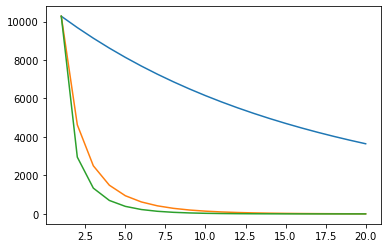

In [311]:
for lr in lr_list:
    df = computeGD(x_0, A, b, kmax, lr, A.shape[0])
    plt.plot(np.arange(1,21), df.loc[:19, 'Error'])
plt.show()

In [327]:
df.tail()

,Iter,Xn,Pk,Error
46,47,"[[0.7389069], [0.1576628], [1.1796624], [-0.15...","[[-4e-07], [-1e-07], [-0.0], [-4e-07], [-4e-07...",4.700000e-06
47,48,"[[0.7389069], [0.1576628], [1.1796624], [-0.15...","[[-2e-07], [-1e-07], [-0.0], [-2e-07], [-3e-07...",3.100000e-06
48,49,"[[0.7389069], [0.1576628], [1.1796624], [-0.15...","[[-2e-07], [-0.0], [-0.0], [-2e-07], [-2e-07],...",2.100000e-06
49,50,"[[0.7389069], [0.1576628], [1.1796624], [-0.15...","[[-1e-07], [-0.0], [-0.0], [-1e-07], [-1e-07],...",1.400000e-06
50,51,"[[0.7389069], [0.1576628], [1.1796624], [-0.15...","[[-1e-07], [-0.0], [-0.0], [-1e-07], [-1e-07],...",9.000000e-07


##### Parte 3 - SGD

In [329]:
lr_list = [0.0005, 0.005, 0.01]
x_0 = np.zeros_like(x_true)
kmax = 1000

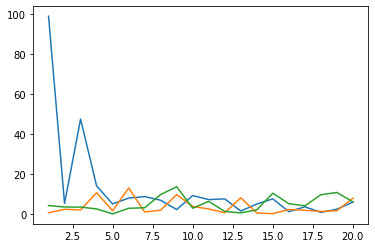

In [330]:
for lr in lr_list:
    df = computeGD(x_0, A, b, kmax, lr, 1)
    plt.plot(np.arange(1,21), df.loc[:19, 'Error'])
plt.show()

In [331]:
df.tail()

,Iter,Xn,Pk,Error
995,996,"[[-0.3415361], [-0.6182745], [2.0379924], [0.5...","[[0.3701072], [-0.1003163], [0.3681385], [0.77...",11.829374
996,997,"[[-0.357893], [-0.6126187], [2.1076902], [0.42...","[[0.0347587], [0.0338323], [0.0254673], [-0.05...",0.251659
997,998,"[[-0.2805616], [-0.6317896], [2.2175407], [0.5...","[[0.2617771], [0.7186316], [1.6971954], [-1.82...",13.691502
998,999,"[[-0.2780877], [-0.618145], [2.1306482], [0.47...","[[-0.6403195], [-0.063358], [1.0722097], [-0.6...",6.497930
999,1000,"[[-0.3387259], [-0.7608214], [2.1575292], [0.5...","[[0.0207911], [-0.1353736], [-0.3769055], [-0....",3.637350


##### Parte 4 - MiniBatch-GD

In [332]:
lr_list = [0.0005, 0.005, 0.01]
mb_list = [25, 50, 100]
x_0 = np.zeros_like(x_true)
kmax = 1000

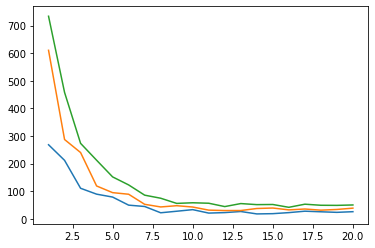

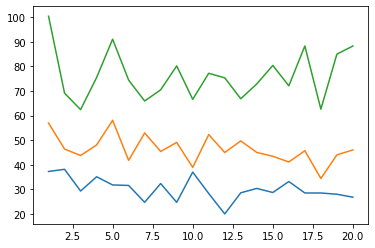

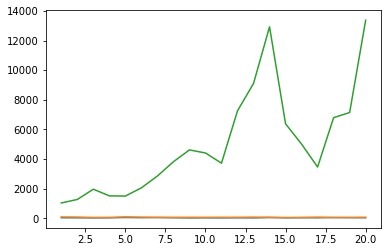

In [334]:
for lr in lr_list:
    for mb in mb_list:
        df = computeGD(x_0, A, b, kmax, lr, mb)
        plt.plot(np.arange(1,21), df.loc[:19, 'Error'])
    plt.show()

In [335]:
df.tail()

,Iter,Xn,Pk,Error
995,996,"[[2.5623988390562385e+25], [-3.806031459729487...","[[2.3920927649211806e+27], [-3.535459512147480...",2.879485e+28
996,997,"[[6.649705685290352e+24], [3.2285637495855853e...","[[1.3949907853485748e+27], [1.8294380582260656...",2.820252e+28
997,998,"[[9.814109432470793e+24], [-2.425191869248346e...","[[3.4614071514307555e+27], [-1.321425637917950...",3.097217e+28
998,999,"[[-3.5877188514189213e+25], [-1.68855648487589...","[[-5.267575378541852e+27], [-4.414343686994154...",6.260624e+28
999,1000,"[[-4.478496191052055e+25], [-4.93266950971464e...","[[2.1720185602971144e+27], [-3.241016486886869...",8.039750e+28


#### Metodo de Newton

##### Parte 1 - GD con Backtracking line search

In [347]:
def evalRosenbrockFunction(x0):
    x = x0[0, 0]
    y = x0[1, 0]
    rsb_function = '100*((y-x**2)**2) + (1 - x)**2'
    result = eval(rsb_function, {}, {'x': x, 'y': y})
    return result

In [348]:
def backTrackingLineSearch(x_0, lr, ro, c):
    x_k = x_0
    condition = True

    while condition:
        gradient = getRosenbrockGradient(x_k)
        x_k1 = x_k - (lr * gradient)

        fk_1 = evalRosenbrockFunction(x_k1)
        f_k = evalRosenbrockFunction(x_k)
        rhs = c * lr * np.matmul(gradient.T, -gradient)

        condition = (fk_1 > (f_k + rhs)) #the loop is the negated condition of the backtracking algorithm
        lr *= ro

    return lr

In [360]:
def rosenbrock_backtracking(x_0, kmax, epsilon, alpha, ro, c, lr_type = 'bracktracking'):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}

    if lr_type == 'backtracking':
        lr = backTrackingLineSearch(x_k, alpha, ro, c)
    else: #else it would be constant
        lr = alpha

    while k < kmax and error > epsilon:
        gradient = getRosenbrockGradient(x_k)
        x_k1 = x_k - (lr * gradient)

        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient, 2)

        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(-1 * gradient.round(7))
        data['Error'].append(error.round(7))

    results = pd.DataFrame(data)
    return results, lr

In [395]:
x_array = [np.array(['0', '0']), np.array(['0.6', '0.6']), np.array(['-0.5', '1']), np.array(['-1.2', '1'])]
x_0 = x_array[0]
epsilon = 0.00000001
kmax = 1000

alpha = 0.0005
ro = 0.5
c = 0.0001

In [396]:
df, lr = rosenbrock_backtracking(x_0, kmax, epsilon, alpha, ro, c, 'backtracking2')
print(lr)
df.tail()

0.0005


,Iter,Xn,Pk,Error
995,996,"[[0.5075355], [0.2551239]]","[[0.4842788], [0.4939297]]",0.691732
996,997,"[[0.5077774], [0.2553707]]","[[0.483806], [0.4936827]]",0.691224
997,998,"[[0.5080191], [0.2556174]]","[[0.483334], [0.4934359]]",0.690718
998,999,"[[0.5082605], [0.255864]]","[[0.4828628], [0.4931892]]",0.690212
999,1000,"[[0.5085017], [0.2561105]]","[[0.4823925], [0.4929427]]",0.689706


##### Parte 2 - Metodo de newton con Backtracking line search

In [397]:
def getRosenbrockHessian(x0):
    x = x0[0, 0]
    y = x0[1, 0]
    g1 = eval('1200*(x**2) - 400*(y) + 2', {}, {'x': x, 'y': y})
    g2 = eval('-400*(x)', {}, {'x': x})
    hessian = np.array([g1, g2, g2, 200], dtype = 'float').reshape(2,2)

    return hessian

In [402]:
def newton_optimization(x_0, kmax, epsilon, alpha, ro, c, lr_type = 'backtracking'):
    k = 0
    x_k = parseInput(x_0, reshape = True)
    error = float('inf')
    data = {'Iter': [], 'Xn': [], 'Pk': [], 'Error': []}

    if lr_type == 'backtracking':
        lr = backTrackingLineSearch(x_k, alpha, ro, c)
    else: #else it would be constant
        lr = alpha

    while k < kmax and error > epsilon:
        gradient = getRosenbrockGradient(x_k)
        hessian = getRosenbrockHessian(x_k)
        p_k = -1 * np.matmul(np.linalg.inv(hessian), gradient)
        x_k1 = x_k + (lr * p_k)

        x_k = x_k1
        k += 1
        error = np.linalg.norm(gradient, 2)

        data['Iter'].append(k)
        data['Xn'].append(x_k.round(7))
        data['Pk'].append(p_k.round(7))
        data['Error'].append(error.round(7))

    results = pd.DataFrame(data)
    return results, lr

In [423]:
x_array = [np.array(['0', '0']), np.array(['0.6', '0.6']), np.array(['-0.5', '1']), np.array(['-1.2', '1'])]
x_0 = x_array[0]
epsilon = 0.00000001
kmax = 3000

alpha = 1
ro = 0.5
c = 0.0001

In [424]:
df, lr = newton_optimization(x_0, kmax, epsilon, alpha, ro, c, 'backtracking')
print(lr)
df.tail()

0.0625


,Iter,Xn,Pk,Error
339,340,"[[1.0], [1.0]]","[[0.0], [0.0]]",0.0
340,341,"[[1.0], [1.0]]","[[0.0], [0.0]]",0.0
341,342,"[[1.0], [1.0]]","[[0.0], [0.0]]",0.0
342,343,"[[1.0], [1.0]]","[[0.0], [0.0]]",0.0
343,344,"[[1.0], [1.0]]","[[0.0], [0.0]]",0.0
